In [16]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy 


In [17]:
df = pd.read_csv("datasets\dataset.csv")

In [18]:
print(df.shape)
df.head()

(4999, 9)


,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [19]:
#sort by user and date because we want to visualize in which order (date) the users (user_id) read the chapters
df = df.sort_values(by=["user_id", "date_created"])
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [20]:
# a chapter belongs to a specific book and chapter alone wouldn't be unique.
# the network is build from nodes (source, target) so we have to combine chapter and book in a single column
df["source"] = df["chapter"] + " " + df["book"]

In [21]:
#This is a very elegant way to do this. My first idea was about using a row based algorithm. So I learned a useful pattern
df["target"] = df["source"].shift(-1)

In [22]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1,chapter-8 bhargava,chapter-8 fain3
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8 fain3,chapter-1 ramamurthy
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1 ramamurthy,chapter-1 thomas
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1,chapter-1 thomas,about-this-book prasanna
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0,about-this-book prasanna,chapter-4 mcnamara


In [31]:
# And again: creation of additional columns using shifting and filter afterwards is a usefull pattern to deal with hierarchical
# structures in a flat table
df["user_check"] = df["user_id"].shift(-1)

In [24]:
# I am wondering whether pandas offers a similar way beside apply and a userdefined function to achieve this
df["keep_drop"] = np.where((df["user_check"] == df["user_id"]), df["user_id"], np.nan)

In [25]:
df = df.dropna(subset=["keep_drop"])

In [26]:
df.shape

(4358, 13)

In [27]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check,keep_drop
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8 fain3,chapter-1 ramamurthy,-2.146355e+09,-2.146355e+09
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1 ramamurthy,chapter-1 thomas,-2.146355e+09,-2.146355e+09
29,-2145886989,10,"""2019-12-10 13:07:05""",chapter-4,mcnamara,2533,461,880,1,chapter-4 mcnamara,chapter-4 mcnamara,-2.145887e+09,-2.145887e+09
32,-2145886989,10,"""2019-12-10 13:41:25""",chapter-4,mcnamara,2533,461,880,1,chapter-4 mcnamara,chapter-1 mcnamara,-2.145887e+09,-2.145887e+09
7,-2145886989,1,"""2019-12-10 19:37:20""",chapter-1,mcnamara,2533,461,880,1,chapter-1 mcnamara,chapter-1 mcnamara,-2.145887e+09,-2.145887e+09


In [29]:
# create the networkx network
G = nx.from_pandas_edgelist(df, "source", "target", create_using=nx.DiGraph)

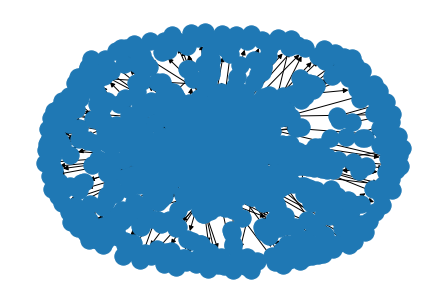

In [30]:
# here I had the problem that the installation and import of scipy was required. Why is this and how can it be avoided? 
# don't forget to install scipy: conda install -c anaconda scipy
nx.draw(G)